In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255, 
                                     shear_range=0.2,zoom_range=0.2, 
                                     horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM--PROJECT/Dataset/test',target_size=(64, 64), 
                                            batch_size=32, 
                                            color_mode='grayscale',
                                            class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM--PROJECT/Dataset/train',
                                          target_size=(64, 64), batch_size=32, 
                                          color_mode='grayscale', 
                                          class_mode='categorical')

Found 30 images belonging to 6 classes.
Found 594 images belonging to 6 classes.


Importing the libraries

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(x_train.class_indices) 

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


Initializing the model

In [ ]:
model=Sequential()

Adding CNN Layers

In [ ]:
#First convolution layer and pooling
model.add(Conv2D(32, (3,3),input_shape=(64,64,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer and pooling
model.add(Conv2D(32, (3,3),activation='relu'))

#input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

#flattening the layers
model.add(Flatten())


Adding Dense Layers

In [ ]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

Configuring the learning process


In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

fitting the model


In [ ]:
model.fit_generator(x_train, 
                    steps_per_epoch = len(x_train),
                    epochs=20, 
                    validation_data=x_test, 
                    validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
1/1 [==============================] - 178s 178s/step - loss: 1.8065 - accuracy: 0.1667 - val_loss: 1.8369 - val_accuracy: 0.1667
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.8025 - accuracy: 0.1667 - val_loss: 1.7680 - val_accuracy: 0.2222
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.7120 - accuracy: 0.3667 - val_loss: 1.7462 - val_accuracy: 0.3081
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.6525 - accuracy: 0.6000 - val_loss: 1.7373 - val_accuracy: 0.1818
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 1.6361 - accuracy: 0.2667 - val_loss: 1.7044 - val_accuracy: 0.3232
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 1.5759 - accuracy: 0.4667 - val_loss: 1.6721 - val_accuracy: 0.3300
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 1.4606 - accuracy: 0.7333 - val_loss: 1.6358 - val_accuracy: 0.3266
Epoch 8/20
1/1 [=====================

save the model

In [ ]:
model.save('/content/drive/MyDrive/IBM--PROJECT/gesture.h5') 

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/IBM--PROJECT/model-bw.json", "w") as json_file:
    json_file.write(model_json)

Test the Model

In [ ]:
from tensorflow.keras.models import load_model 
from keras.preprocessing import image 
model= load_model("gesture.h5") #Loading the model for testing =

In [ ]:
import tensorflow as tf
import numpy as np  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")
path= r"/content/drive/MyDrive/IBM--PROJECT/Dataset/test/2/3.jpg"

Populating the interactive namespace from numpy and matplotlib


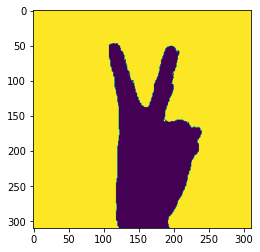

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [ ]:
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)#image to array
x.shape

(64, 64, 1)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x = np.expand_dims(x,axis=0)

In [ ]:
x.shape

(1, 64, 64, 1)

In [ ]:
pred=(model.predict(x) > 0.5).astype("int64")
pred

1/1 [==============================] - 0s 120ms/step


array([[0, 0, 1, 0, 0, 0]])

In [ ]:
index=['0', '1', '2', '3', '4', '5']

In [ ]:
index[np.argmax(pred[0])]

'2'

In [ ]:
import numpy as np
p=[]
for i in range(0,6):
    for j in range(0,5):
        path= r"/content/drive/MyDrive/IBM--PROJECT/Dataset/test/"+str(i)+"/"+str(j)+".jpg"
        img = image.load_img(path,color_mode="grayscale",target_size=(64,64))
        x = image.img_to_array(img)#image to array
        x = np.expand_dims (x,axis = 0) #changing the shape
        pred = np.argmax(model.predict(x), axis=-1) #predicting the classes
        p.append(pred)
print(p)

1/1 [==============================] - 0s 19ms/step
[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([2]), array([2]), array([2]), array([2]), array([3]), array([3]), array([3]), array([4]), array([3]), array([4]), array([4]), array([4]), array([4]), array([4]), array([5]), array([5]), array([5]), array([5]), array([4])]


In [ ]:
result=[]
index=['0','1','2','3','4','5']
for i in p:
    result.append(index[i[0]])
    
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '3', '3', '3', '4', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '4']
